In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt


import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic

import seaborn as sns

import statsmodels.api as sm

from scipy import stats

In [2]:
dwarf_table = Table.read('dwarf_table.txt', format = 'ascii.commented_header')
dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,BPTclass,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,1.0,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,1.0,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,1.0,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,1.0,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,1.0,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549


In [3]:
sfd = dwarf_table['BPTclass'] == 1
#sfd_t3 = dwarf_t3['BPTclass'] == 1

In [4]:
# Separating into Void, Wall, or Other Dwarf Galaxies

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)


#dwarf_wall_t3 = dwarf_t3['vflag_VF']==0
#dwarf_void_t3 = dwarf_t3['vflag_VF']==1
#dwarf_other_t3 = ~(dwarf_wall_t3 | dwarf_void_t3)

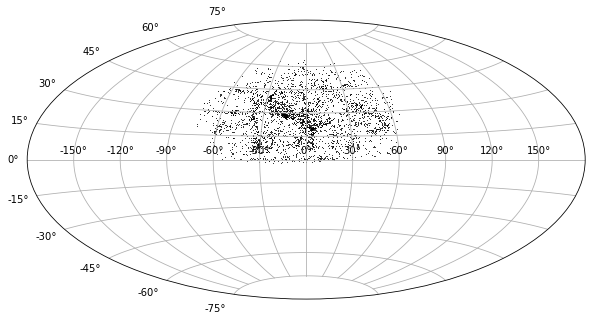

In [5]:
import astropy.units as u
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord

plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

#eq = SkyCoord(180-Mr20['RA'], Mr20['DEC'], unit=u.deg)
#gal = eq.galactic

gal = SkyCoord(ra=180-dwarf_table[dwarf_wall]['RA'], dec=dwarf_table[dwarf_wall]['DEC'], unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.ra.wrap_at('180d').radian,
            gal.dec.radian, marker='o', c='k', s=1, lw=0); #added same marker appearance as above code

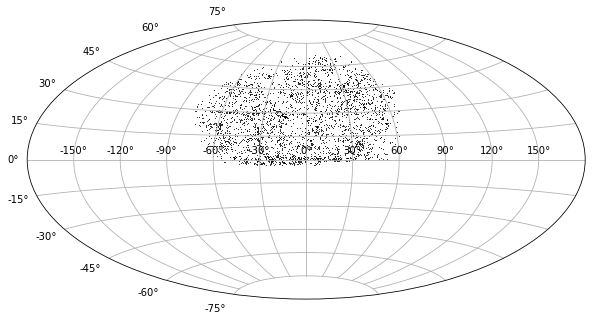

In [6]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

#eq = SkyCoord(180-Mr20['RA'], Mr20['DEC'], unit=u.deg)
#gal = eq.galactic

gal = SkyCoord(ra=180-dwarf_table[dwarf_void]['RA'], dec=dwarf_table[dwarf_void]['DEC'], unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.ra.wrap_at('180d').radian,
            gal.dec.radian, marker='o', c='k', s=1, lw=0); #added same marker appearance as above code

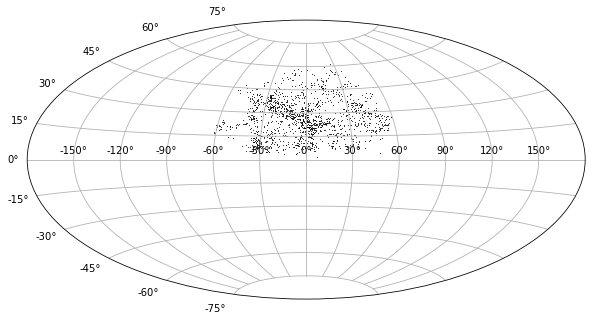

In [7]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

#eq = SkyCoord(180-Mr20['RA'], Mr20['DEC'], unit=u.deg)
#gal = eq.galactic

gal = SkyCoord(ra=180-dwarf_table[dwarf_wall & sfd]['RA'], dec=dwarf_table[dwarf_wall & sfd]['DEC'], unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.ra.wrap_at('180d').radian,
            gal.dec.radian, marker='o', c='k', s=1, lw=0); #added same marker appearance as above code

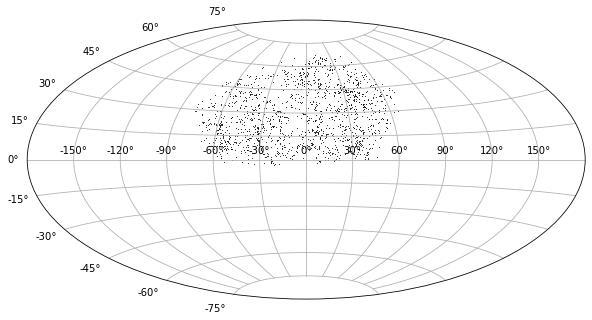

In [8]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

#eq = SkyCoord(180-Mr20['RA'], Mr20['DEC'], unit=u.deg)
#gal = eq.galactic

gal = SkyCoord(ra=180-dwarf_table[dwarf_void & sfd]['RA'], dec=dwarf_table[dwarf_void & sfd]['DEC'], unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.ra.wrap_at('180d').radian,
            gal.dec.radian, marker='o', c='k', s=1, lw=0);

In [9]:
len(dwarf_table[dwarf_wall & sfd])

1547

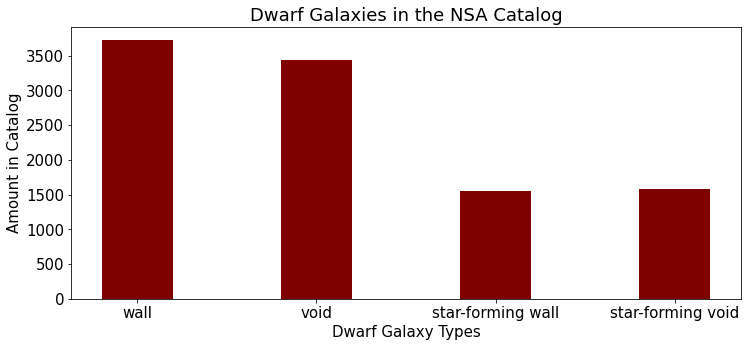

In [10]:
# creating the dataset
plt.rcParams.update({'font.size': 15})
data = {'wall':len(dwarf_table[dwarf_wall]), 'void':len(dwarf_table[dwarf_void]), 'star-forming wall':len(dwarf_table[dwarf_wall & sfd]),
        'star-forming void':len(dwarf_table[dwarf_void & sfd])}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (12, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Dwarf Galaxy Types")
plt.ylabel("Amount in Catalog")
plt.title("Dwarf Galaxies in the NSA Catalog")
plt.show()

## Now looking at all galaxies

In [11]:
gal_table = Table.read('gal_table.txt', format = 'ascii.commented_header')
gal_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#,BPTclass,gamma_ratio
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32
-99.0,0.0,146.714215072841,-1.0412800233313741,0.021222278475761414,-19.30365562438965,2.3124398291110992,nan,nan,nan,nan,nan,nan,nan,nan,9,0,nan,1
1.0,1.0,146.6285851269414,-0.7651620976591762,0.0646563172340393,-19.97649574279785,2.976039946079254,-11.241625785827637,nan,nan,nan,nan,nan,nan,nan,2,1,3.0,2
-99.0,0.0,146.63170644325592,-0.9883467023052999,0.05265425145626068,-18.431812286376953,1.7119742929935455,nan,nan,nan,nan,nan,nan,nan,nan,2,2,nan,1
1.0,1.0,146.9341288729797,-0.6704053610430766,0.12127048522233963,-21.559162139892578,3.0934733152389526,-11.71275806427002,nan,nan,nan,nan,nan,nan,nan,9,3,-1.0,2
-99.0,1.0,146.9634997327016,-0.5447758299302171,0.055980585515499115,-19.10099220275879,2.044341266155243,nan,nan,nan,nan,nan,nan,nan,nan,2,4,nan,1


In [12]:
g_sfd = gal_table['BPTclass'] == 1

In [13]:
gal_wall = gal_table['vflag_VF']==0
gal_void = gal_table['vflag_VF']==1
gal_other = ~(gal_wall | gal_void)


#dwarf_wall_t3 = dwarf_t3['vflag_VF']==0
#dwarf_void_t3 = dwarf_t3['vflag_VF']==1
#dwarf_other_t3 = ~(dwarf_wall_t3 | dwarf_void_t3)

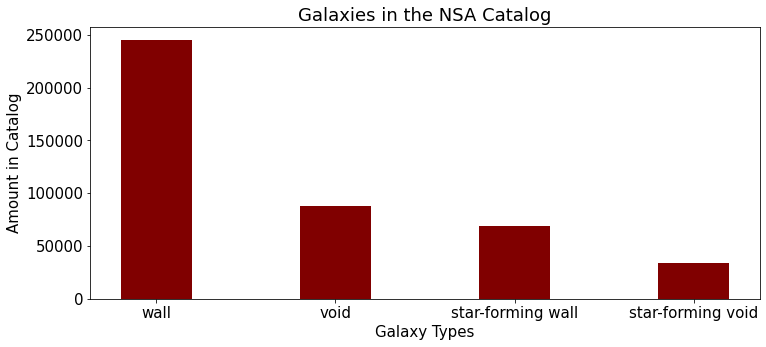

In [14]:
# creating the dataset
plt.rcParams.update({'font.size': 15})
data = {'wall':len(gal_table[gal_wall]), 'void':len(gal_table[gal_void]), 'star-forming wall':len(gal_table[gal_wall & g_sfd]),
        'star-forming void':len(gal_table[gal_void & g_sfd])}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (12, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Galaxy Types")
plt.ylabel("Amount in Catalog")
plt.title("Galaxies in the NSA Catalog")
plt.show()

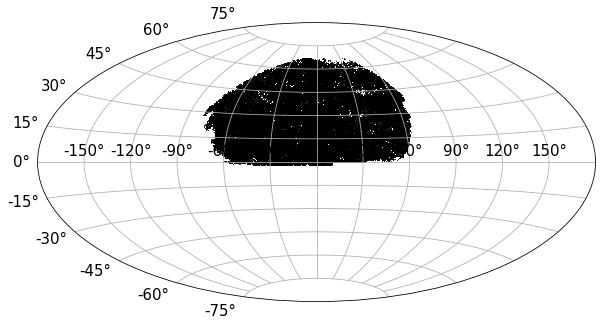

In [15]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure


gal = SkyCoord(ra=180-gal_table[gal_wall]['RA'], dec=gal_table[gal_wall]['DEC'], unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.ra.wrap_at('180d').radian,
            gal.dec.radian, marker='o', c='k', s=1, lw=0); #added same marker appearance as above code

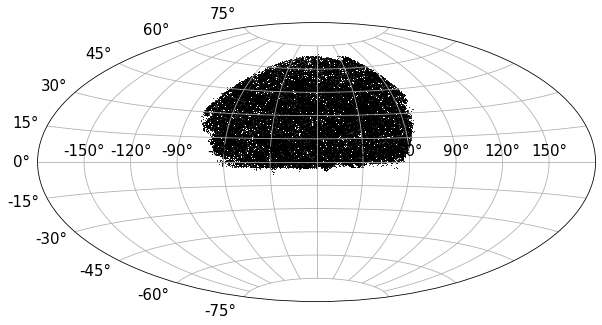

In [16]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure


gal = SkyCoord(ra=180-gal_table[gal_void]['RA'], dec=gal_table[gal_void]['DEC'], unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.ra.wrap_at('180d').radian,
            gal.dec.radian, marker='o', c='k', s=1, lw=0);

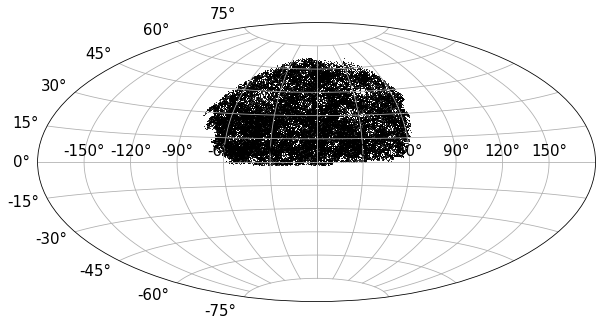

In [17]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

gal = SkyCoord(ra=180-gal_table[gal_wall & g_sfd]['RA'], dec=gal_table[gal_wall & g_sfd]['DEC'], unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.ra.wrap_at('180d').radian,
            gal.dec.radian, marker='o', c='k', s=1, lw=0); 

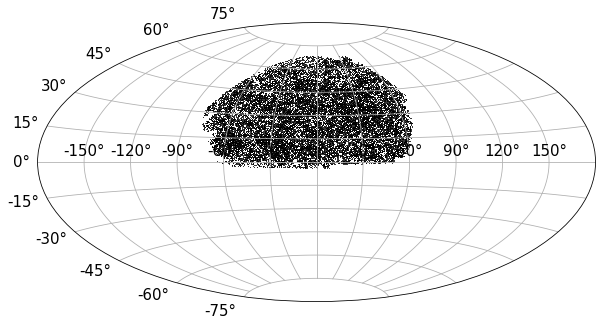

In [18]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

gal = SkyCoord(ra=180-gal_table[gal_void & g_sfd]['RA'], dec=gal_table[gal_void & g_sfd]['DEC'], unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.ra.wrap_at('180d').radian,
            gal.dec.radian, marker='o', c='k', s=1, lw=0);

# Percentage Calculations

In [26]:
# dwarf wall / gal wall
print((len(dwarf_table[dwarf_wall]) / len(gal_table[gal_wall]))*100)

1.5205804813947223


In [27]:
# dwarf void / gal void
print((len(dwarf_table[dwarf_void]) / len(gal_table[gal_void]))*100)

3.905192130446161


In [28]:
# star forming dwarf wall / dwarf wall
print((len(dwarf_table[dwarf_wall & sfd]) / len(dwarf_table[dwarf_wall]))*100)

41.51905528717123


In [30]:
# star forming dwarf void / dwarf void
print((len(dwarf_table[dwarf_void & sfd]) / len(dwarf_table[dwarf_void]))*100)

46.00815850815851


In [31]:
# Dwarf SF wall / Gal SF wall
print((len(dwarf_table[dwarf_wall & sfd]) / len(gal_table[gal_wall & g_sfd]))*100)

2.2314538347252872


In [32]:
# Dwarf SF void / Gal SF void
print((len(dwarf_table[dwarf_void & sfd]) / len(gal_table[gal_void & g_sfd]))*100)

4.634847951156511
